Ex. 1

- Read the file `wnv_human_cases.csv` as a `pandas` DataFrame
- Add up the positive cases for each year
- Find the week in the year when there are the highest average cases of West Nile virus reported
- Which county reported the highest number of cases in that week and what year did it happen?
- Plot the orignal data and a rolling average with window length of 3 and minimum period of 1 on the same plot

In [16]:
import pandas as pd 

#Read in file using pandas method

human = pd.read_csv('wnv_human_cases.csv')

In [17]:
human

,Year,Week Reported,County,Positive Cases
0,2006,35,Alameda,1
1,2006,33,Butte,4
2,2006,34,Butte,1
3,2006,35,Butte,10
4,2006,36,Butte,2
...,...,...,...,...
1903,2019,33,Tulare,1
1904,2019,35,Tulare,2
1905,2019,36,Tulare,1
1906,2019,37,Tulare,1


In [18]:
#Group by year and display only the positive cases variable.
positive_by_year = human[['Positive Cases', 'Year']].groupby(['Year']).sum()

positive_by_year

,Positive Cases
Year,
2006,272
2007,380
2008,445
2009,112
2010,111
2011,158
2012,479
2013,379
2014,801


In [19]:
#Find the week with the highest number of average cases.Take the average for each week, sort it, and then print the top value.
human[['Positive Cases', 'Week Reported']].groupby(['Week Reported']).mean().sort_values(by = 'Positive Cases', ascending=False).head(1)

,Positive Cases
Week Reported,
41,3.708333


In [20]:
#Find the county and year with the highest number of cases in that week

human.iloc[human['Positive Cases'][human['Week Reported']==41].idxmax()]

Year                     2017
Week Reported              41
County            Los Angeles
Positive Cases             40
Name: 1642, dtype: object

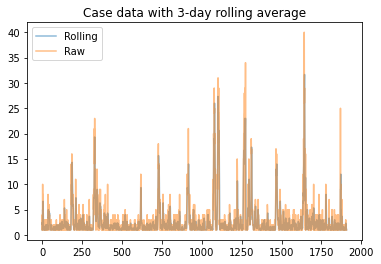

In [21]:
import matplotlib.pyplot as plt
#Plot the original data and a rolling average with window length of 3 and minimum period of 1 on the same plot
rolling = human['Positive Cases'].rolling(window = 3,min_periods = 1).mean()
regular = human['Positive Cases']

plt.plot(rolling, label = 'Rolling', alpha = .5)
plt.plot(regular, label = 'Raw', alpha = .5)
plt.title("Case data with 3-day rolling average")
plt.legend()

Ex. 2 

- Create a `pandas` DataFrame from the data in `yuck.csv`
- When done, your DataFame should look like the one in `less_yuck.csv`

In [22]:
#take a look at less yuck
less_yuck = pd.read_csv('less_yuck.csv')
less_yuck.head()

,first,last,age
0,Driehe,"Dietriech, von",23
1,Ahmad,"Ibrahim, bin",34
2,Charles,Blow,57
3,Andrew,Carnegie,87
4,Amy,Good,12


In [23]:
import csv
#Try loading in yuck

yuck = pd.read_table('yuck.csv', comment = '%', sep = ':|,', names = ['First', 'Last', 'Age'],skiprows=3)
yuck

/opt/conda/lib/python3.7/site-packages/pandas/io/parsers.py:755: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


,First,Last,Age
"""Driehe""","""Dietriech","von""",23.0
"""Ahmad""","""Ibrahim","bin""",34.0
Charles,Blow,57,NaN
Andrew,Carnegie,87,NaN
Amy,Good,12,NaN


In [24]:
# Remove the quotes from the dataframe
#Solution taken fromhttps://stackoverflow.com/questions/21491291/remove-all-quotes-within-values-in-pandas
yuck['Age'] = yuck['Age'].astype('str')
yuck = yuck.reset_index()
yuck.apply(lambda s:s.str.replace('"', ""))

,index,First,Last,Age
0,Driehe,Dietriech,von,23.0
1,Ahmad,Ibrahim,bin,34.0
2,Charles,Blow,57,nan
3,Andrew,Carnegie,87,nan
4,Amy,Good,12,nan


In [25]:
#Shift over the values for nan in the dataframe



Ex. 3

- Create a `pnadas` DataFrame called `df` from the data set at https://bit.ly/2ksKr8f, taking care to only read in the `time` and `value` columns. (5 points)
- Fill all rows with missing values with the value from the last non-missing value (i.e. forward fill) (5 points)
- Convert to a `pandas` Series `s` using `time` as the index (5 points)
- Create a new series `s1` with the rolling average using a shifting window of size 7 and a minimum period of 1 (5 points)
- Report the `time` and value for the largest rolling average (5 points)

In [26]:
#Read in data
df = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/forecast/gold.csv', usecols = ['time','value'])
df.head()

,time,value
0,1,306.25
1,2,299.50
2,3,303.45
3,4,296.75
4,5,304.40


In [27]:
#Forward fill the dataset
df = df.fillna(method='ffill')

In [28]:
#Change index and convert to series
s = df.set_index('time')
s = s['value']
type(s)

pandas.core.series.Series

In [29]:
#Create new series with rolling average
s1 = s.rolling(window = 7, min_periods = 1).mean()

In [30]:
#Time and value for highest rolling average
max_time = s1.argmax()

#Print the maximum rolling average and the associated time index. 
print(s1[max_time], max_time)

504.4714285714288 771


Ex. 4

Given the DataFrame `df`, recreate the correlation plot shown using `seaborn`. Note the color mapping is `viridis`.

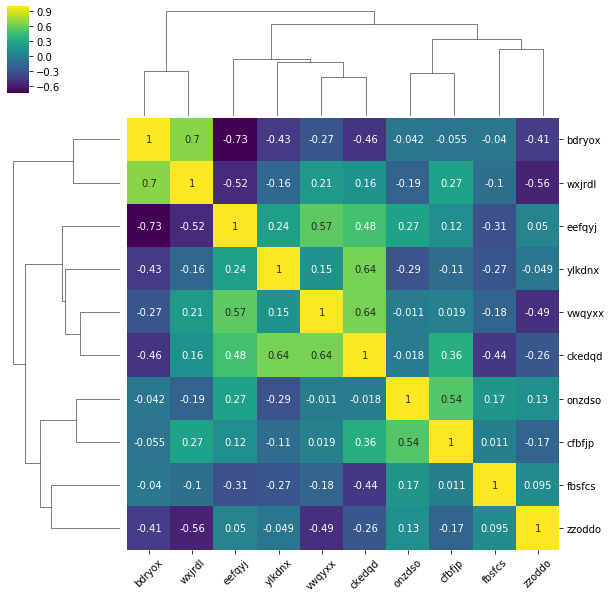

In [31]:
import numpy as np
import string

np.random.seed(123)
nrows = 10
ncols = 10
k = 6
xs = np.random.normal(0, 1, (nrows, ncols))
names = [''.join(np.random.choice(list(string.ascii_lowercase), k)) for i in range(10)]
df = pd.DataFrame(xs, columns=names)
df

from IPython.display import Image
Image('corrplot.png')

In [36]:
import seaborn as sns

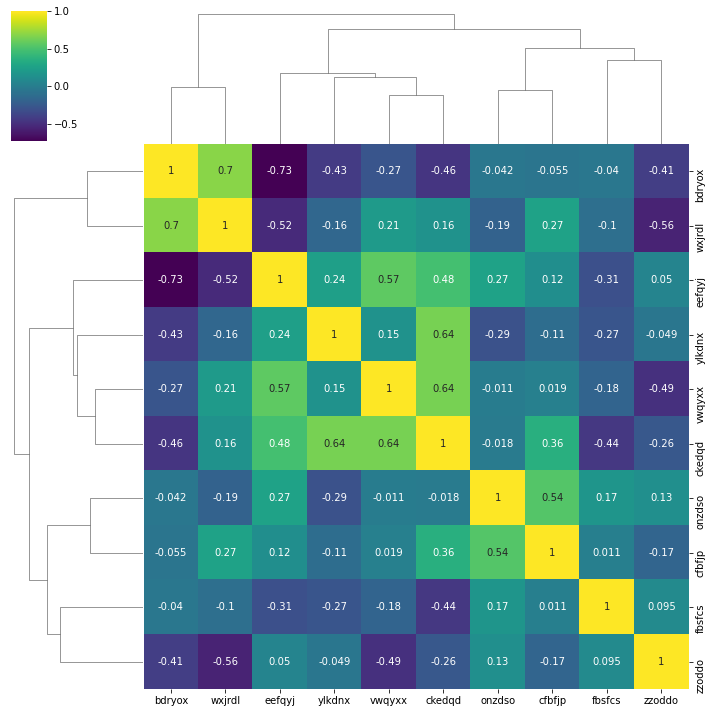

In [44]:
#Construct heatmap
sns.clustermap(df.corr(), cmap = 'viridis', annot = True)